In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load Data

In [25]:
# Load the raw Fashion Mnist data.
img_cols = 28
img_rows = 28
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Train data: 59000 samples from original train set: 1~59000
# Validation data: 1000 samples from original train set: 59000~60000
# Test data: 10000 samples
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000,-1)

num_train = 59000
num_validation = 1000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(59000, 784) (1000, 784) (10000, 784) (128, 784)


## Visualization

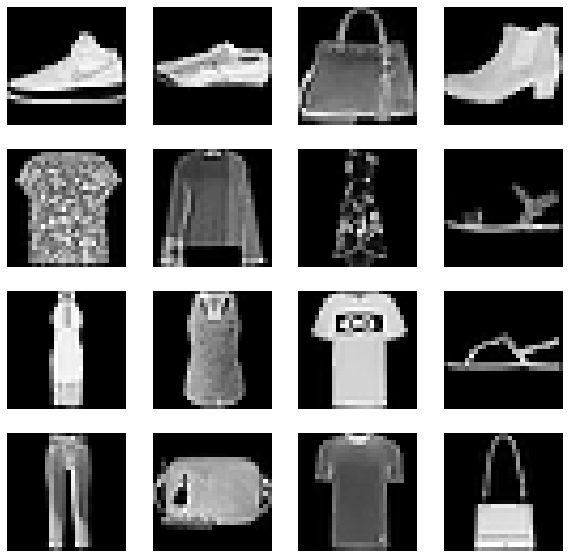

In [26]:
# Visualization of the original data.

fig = plt.figure(figsize=(10,10))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(X_dev[i,:].reshape(28,28), 'gray')
    ax.axis('off')

In [27]:
from utils.image_generator import ImageGenerator

In [28]:
print(X_dev.shape)
print(X_dev.reshape(-1,1,28,28).transpose(0,2,3,1).shape)

(128, 784)
(128, 28, 28, 1)


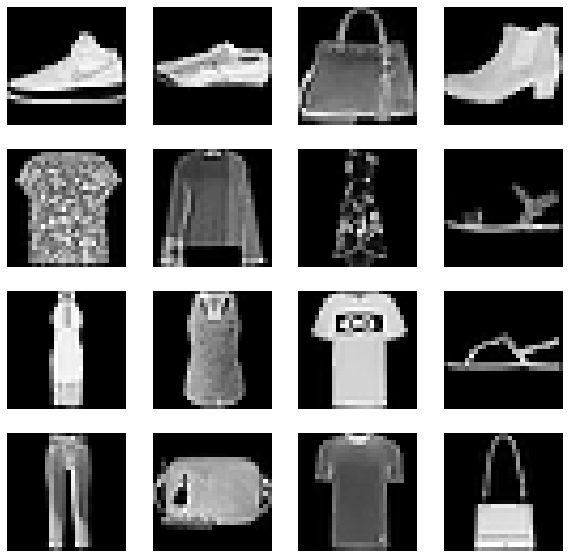

In [29]:
gen = ImageGenerator(X_dev.reshape(-1,1,28,28).transpose(0,2,3,1), y_dev)
gen.show(X_dev)

Current translation:  5 0


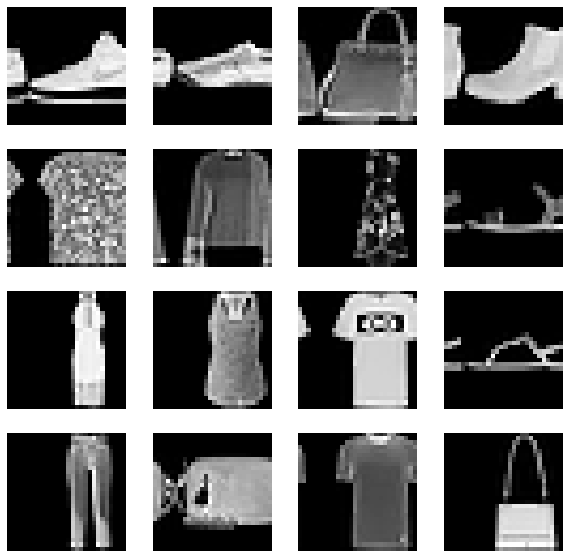

In [30]:
translated = gen.translate(5,0)
gen.show(translated)

Currrent rotation:  30


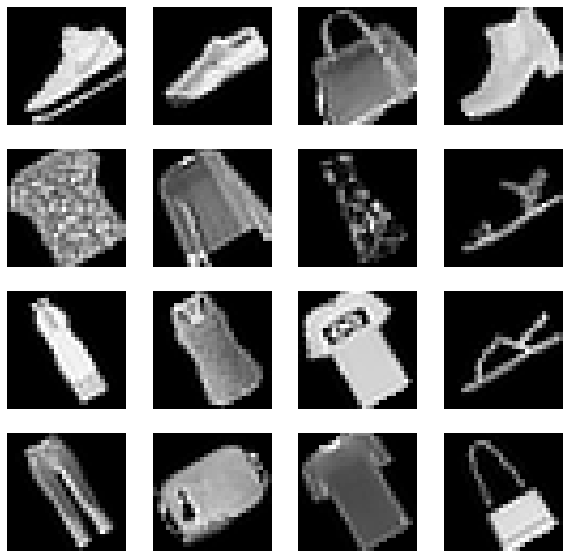

In [31]:
rotated = gen.rotate(30)
gen.show(rotated)

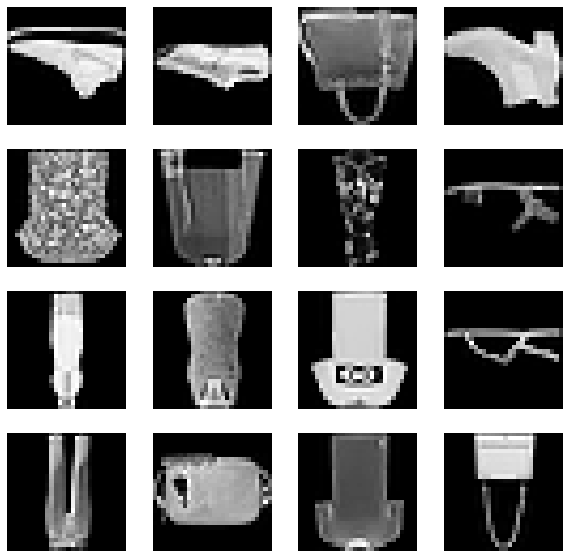

In [32]:
flip=gen.flip(mode='hv')
gen.show(flip)

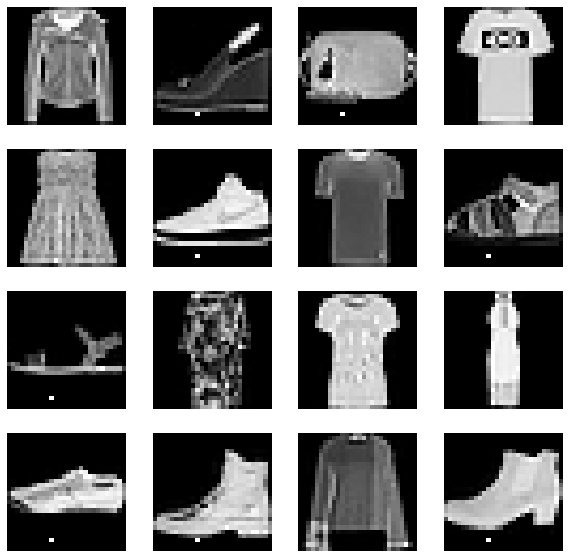

In [33]:
noisy=gen.add_noise(0.2,1)
gen.show(noisy)

In [34]:
X_t = X_train.reshape(-1,1,28,28).transpose(0,2,3,1)
X_v = X_val.reshape(-1,1,28,28).transpose(0,2,3,1)

print(X_t.shape)
print(X_v.shape)

(59000, 28, 28, 1)
(1000, 28, 28, 1)


In [38]:
from utils.neuralnets.cnn.my_LeNet_model import my_training_task4

tf.reset_default_graph()

my_training_task4(X_t, y_train, X_v, y_val, conv_featmap=[6],fc_units=[84],
                      conv_kernel_size=[5],pooling_size=[2],conv_stride=[1,1],
                      l2_norm=0.01,seed=235,learning_rate=1e-3,epoch=20,batch_size=295,
                      verbose=False,pre_trained_model=None)

Current translation:  5 1
Currrent rotation:  45
Building  my_LeNet. Parameters: 
conv_featmap=[6, 8]
fc_units=[100]
conv_kernel_size=[3, 3]
pooling_size=[2, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

number of batches for training: 1000
Instructions for updating:
Use tf.cast instead.
epoch 1 
Best validation accuracy! iteration:100 accuracy: 73.8%
Best validation accuracy! iteration:200 accuracy: 81.2%
epoch 2 
Best validation accuracy! iteration:1100 accuracy: 86.2%
epoch 3 
epoch 4 
Best validation accuracy! iteration:3200 accuracy: 87.8%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends. The best valid acc

## Transfer Learning and Test Time Augmentation

In [15]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from utils.cifar_utils import load_data

In [22]:
import numpy as np

# Load the raw CIFAR-10 data.
X_train, y_train = load_data(mode='train')

print(X_train.shape)

# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
num_training = 49000
num_validation = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image

X_train = X_train.reshape(-1,3,32,32).transpose(0,2,3,1) / 255
X_val = X_val.reshape(-1,3,32,32).transpose(0,2,3,1) / 255

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_val_dummy = tf.keras.utils.to_categorical(y_val)
print('Train labels shape (one-hot): ', y_train_dummy.shape)
print('Validation labels shape (one-hot): ', y_val_dummy.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(50000, 3072)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Train labels shape (one-hot):  (49000, 10)
Validation labels shape (one-hot):  (1000, 10)


In [18]:
# Import the mobilenet model and discard the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Colocations handled automatically by placer.
17227776/17225924 [==============================] - 3s 0us/step


In [19]:
model=Model(inputs=base_model.input,outputs=preds)

In [20]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [22]:
bs = 98 #batch size
epc = 25 #number of epoches
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator = train_datagen.flow(X_train, y_train_dummy, batch_size=bs)
step_size_train=train_generator.n//train_generator.batch_size

In [ ]:
# Train the model
history = model.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=(X_val, y_val_dummy))

In [ ]:
print(f'Baseline accuracy: {model.evaluate(X_val, y_val_dummy)[1]}')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# call an ImageDataGenerator similar to training set for test set.
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect', 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [ ]:
from tqdm import tqdm

# test time augmentation, we set TTA for 10 times averaging.
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(test_datagen.flow(X_val, batch_size=bs, shuffle=False), steps = len(X_val)/bs)
    predictions.append(preds)

In [ ]:
# print final prediction results
final_pred = np.mean(predictions, axis=0)
print(f'Accuracy with TTA: {np.mean(np.equal(np.argmax(y_val_dummy, axis=-1), np.argmax(final_pred, axis=-1)))}')